In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm


In [2]:
house = pd.read_csv("train.csv",header=0)
# for x in house.columns:
#     print(x, pd.isna(house[x]).sum())
"""MasVnrArea,lotfrontage
replace NaNs with 0, thus we know its not there
just fill the electrical with the standard one...
drop the year the garages were built"""


house.loc[pd.isna(house["MasVnrArea"]),"MasVnrArea"] = 0

house.loc[pd.isna(house["LotFrontage"]),"LotFrontage"] = 0
house.loc[pd.isna(house["Electrical"]),"Electrical"] = "SBrkr" #we'll just assume its standard...
house.drop(columns="GarageYrBlt",inplace=True)
#replace the MSSubClass numbers with strings describing the style of dwelling in an awful way
house.loc[house["MSSubClass"] == 20,"MSSubClass"] = "1-STORY 1946 & NEWER ALL STYLES"
house.loc[house["MSSubClass"] == 30,"MSSubClass"] = "1-STORY 1945 & OLDER"
house.loc[house["MSSubClass"] == 40,"MSSubClass"] = "1-STORY W/FINISHED ATTIC ALL AGES"
house.loc[house["MSSubClass"] == 45,"MSSubClass"] = "1-1/2 STORY - UNFINISHED ALL AGES"
house.loc[house["MSSubClass"] == 50,"MSSubClass"] = "1-1/2 STORY FINISHED ALL AGES"
house.loc[house["MSSubClass"] == 60,"MSSubClass"] = "2-STORY 1946 & NEWER"
house.loc[house["MSSubClass"] == 70,"MSSubClass"] = "2-STORY 1945 & OLDER"
house.loc[house["MSSubClass"] == 75,"MSSubClass"] = "2-1/2 STORY ALL AGES"
house.loc[house["MSSubClass"] == 80,"MSSubClass"] = "SPLIT OR MULTI-LEVEL"
house.loc[house["MSSubClass"] == 85,"MSSubClass"] = "SPLIT FOYER"
house.loc[house["MSSubClass"] == 90,"MSSubClass"] = "DUPLEX - ALL STYLES AND AGES"
house.loc[house["MSSubClass"] == 120,"MSSubClass"] = "1-STORY PUD (Planned Unit Development) - 1946 & NEWER"
house.loc[house["MSSubClass"] == 150,"MSSubClass"] = "1-1/2 STORY PUD - ALL AGES"
house.loc[house["MSSubClass"] == 160,"MSSubClass"] = "2-STORY PUD - 1946 & NEWER"
house.loc[house["MSSubClass"] == 180,"MSSubClass"] = "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER"
house.loc[house["MSSubClass"] == 190,"MSSubClass"] = "2 FAMILY CONVERSION - ALL STYLES AND AGES"

# house = pd.get_dummies(["MSZoning","Street","Alley","LotShape","LandContour","building","Utilities","LotConfig","LandSlope","Neighborhood"])
#Use a list of the ones with NaNs in them already to decide if you drop the last column or not
nans = ["Alley","BsmtExposure","BsmtFinType1","BasmtFinType2","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","BsmtQual","BsmtCond","GarageQual","GarageCond","PoolQc","Fence","MiscFeature"]
for x in house.columns:
    if x in nans:
        if np.isreal(house[x].iloc[0])==False:
            new = pd.get_dummies(house[x])
            house = pd.concat([house,new],axis = 1)
    else:
        if np.isreal(house[x].iloc[0])==False:
            new = pd.get_dummies(house[x])
            new.drop(new.columns[-1],axis=1,inplace=True)
            house = pd.concat([house,new],axis =1)
#house now contains a bunch of onehot encoded columns

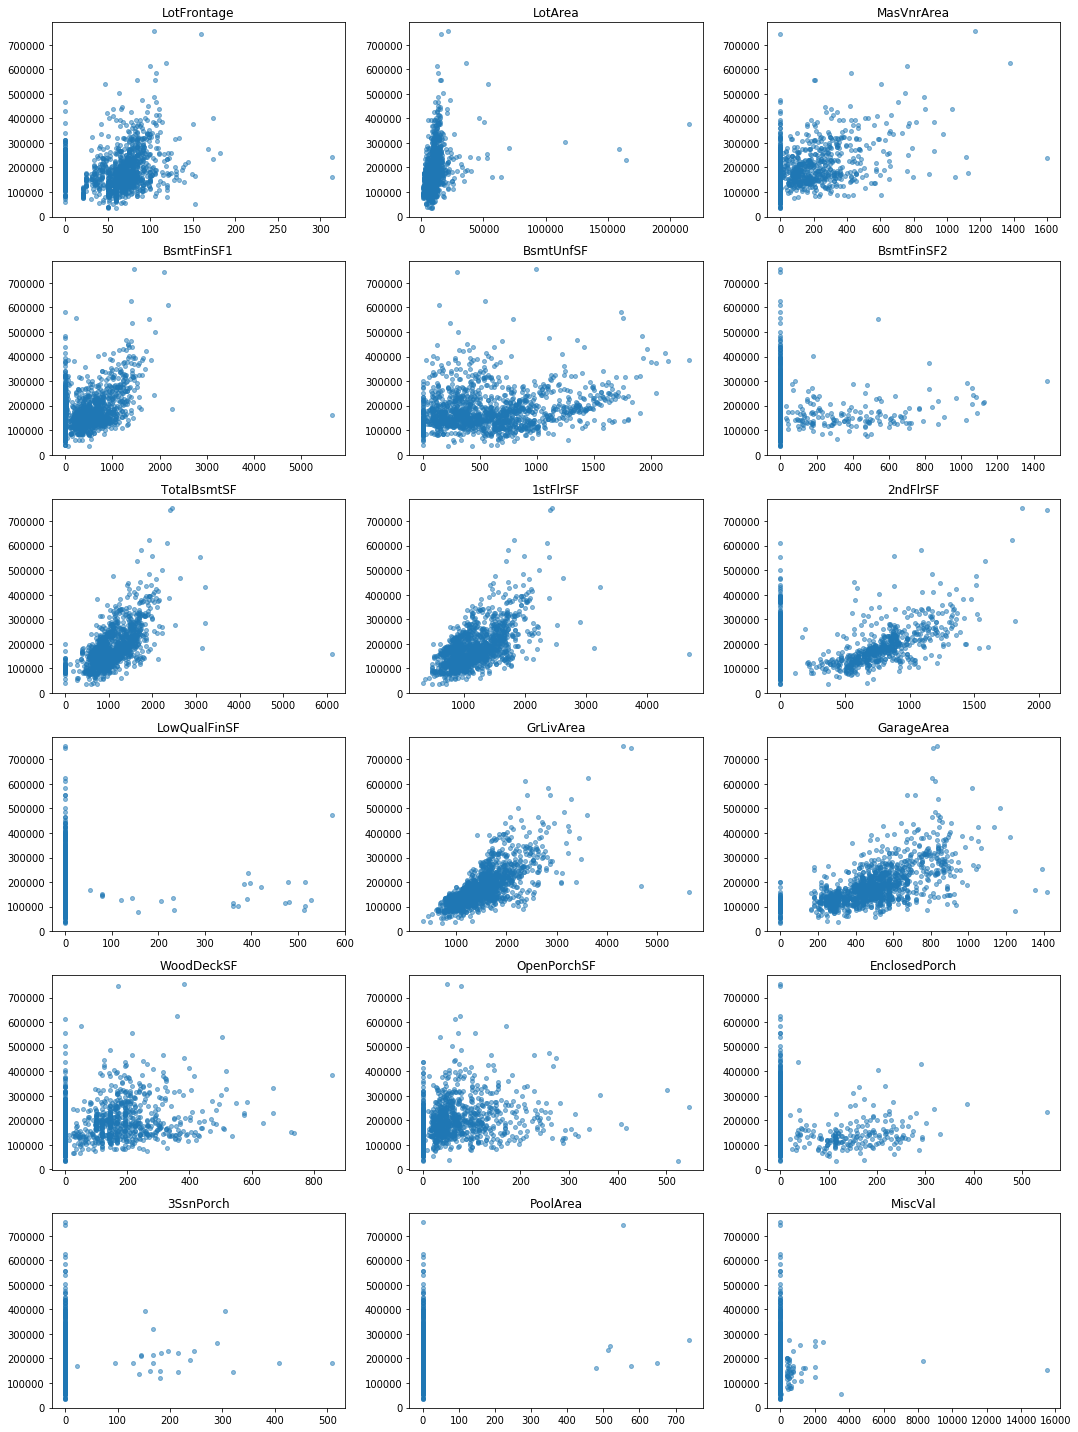

In [3]:
# print(house.columns[60:100])
i = 1
plt.figure(figsize=(15,20))
flot = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","BsmtFinSF2","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","PoolArea","MiscVal"]

for x in flot:
    ax = plt.subplot(6,3,i)
    ax.plot(house[x],house["SalePrice"],'o',ms=4,alpha=.5)
    ax.title.set_text(x)
    i+=1
plt.tight_layout()
plt.show()

According to the plots, GrLivArea,GarageArea,1stFlrSF,2ndFlrSFBsmtFinSF1,LotArea,and TotalBsmtSF seem to be linearly related to saleprice. I'll try taking the square root of the LotFrontage as it almost seems to make a curve up. BsmtUnfSF seems to maybe do the same thing.


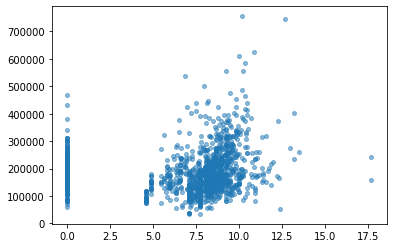

In [4]:
house["sqlot"] = np.sqrt(house["LotFrontage"])
house["sqbsmt"] = np.sqrt(house["BsmtUnfSF"])
plt.plot(house["sqlot"],house["SalePrice"],"o",ms=4,alpha=.5)
plt.show()
"""It seems to help a little bit i guess"""

In [5]:
"""I'll take first floor area  cross second floor area, basement area cross lot area, and
Grlivarea and garage area"""

house["1stcross2nd"] = house["1stFlrSF"]*house["2ndFlrSF"]
house["basecrosslot"] = house["BsmtFinSF1"]*house["LotArea"]
house["livcrossgarage"] = house["GrLivArea"]*house["GarageArea"]


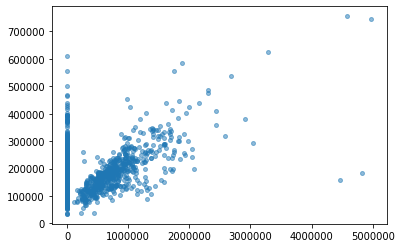

In [6]:
plt.plot(house["1stcross2nd"],house["SalePrice"],"o",ms=4,alpha=.5)
plt.show()

In [12]:
"""constant Column"""
house["constant"] = 1


In [15]:
result = sm.ols(formula="'SalePrice'~ '1stcross2nd'+'basecrosslot'+'livcrossgarage'", data=house)
print(result.params)
#fail to run an OLS on the dataframe in any sense
#im sure overall quality and first floor area cross 2nd floor are pretty good indicators of sale price

PatsyError: Number of rows mismatch between data argument and 'SalePrice' (1460 versus 1)
    'SalePrice'~ '1stcross2nd'+'basecrosslot'+'livcrossgarage'
    ^^^^^^^^^^^